# Case study on Pre-processing
### Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [2]:
# Loading the csv file into a pandas dataframe.
df = pd.read_csv("titanic_dataset.csv")

In [3]:
# display the contents in the dataset with 3 rows
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [4]:
# Before set index, check the columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Reset the index as ‘PassengerId’ feature
df = pd.read_csv("titanic_dataset.csv",index_col='PassengerId') # or we can use  df.set_index('PassengerId') 

In [6]:
# After set index, check the columns in the dataset
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# display the contents in the dataset with 3 rows
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 3. Check the basic details of the dataset

In [8]:
# display the contents in the dataset
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# The summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# number of elements in each dimension (Rows and Columns)
df.shape

(891, 11)

In [11]:
# check the columns in the dataset
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

For our titanic dataset has 891 rows with 11 features, it includes Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked. As per the dataset has some missing values. we can treat missing values after the basic questions.

### 4. Fill in all the missing values present in all the columns in the dataset

In [12]:
# Calculating the null values present in each columns in the dataset
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# length of the dataset
len(df)

891

In [14]:
# number of elements in each dimension (Rows and Columns)
df.shape

(891, 11)

In [15]:
# to determine the relative frequency of the missings per column to decide whether to simply drop or substitute the missings
df.isna().sum()/(len(df))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

As you can see that there are null values present in the dataset. The features age, cabin and embarked are having the null values. we can treat the null values. 

cabin feature have 77% out of 100% null values present in the dataset so we can remove the cabin. If the columns have more than half of the rows as null values then the entire column can be dropped. Hence it's better to drop the column for a good output. But in our question clearly mentioned that fill the all missing values. Since cabin is a categorical data we can fill the missing values with mode method.

Age and embarked have 19.87% and 0.22% null values , we can treat the age and embarked features.

In [16]:
# Display the data before missing values treatment
df[df.isna().any(axis=1)] # check at least one null values in a row 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [17]:
# Calculating the null values present in each columns in the dataset
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now, we can treat the missing values for age feature

In [18]:
# The summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


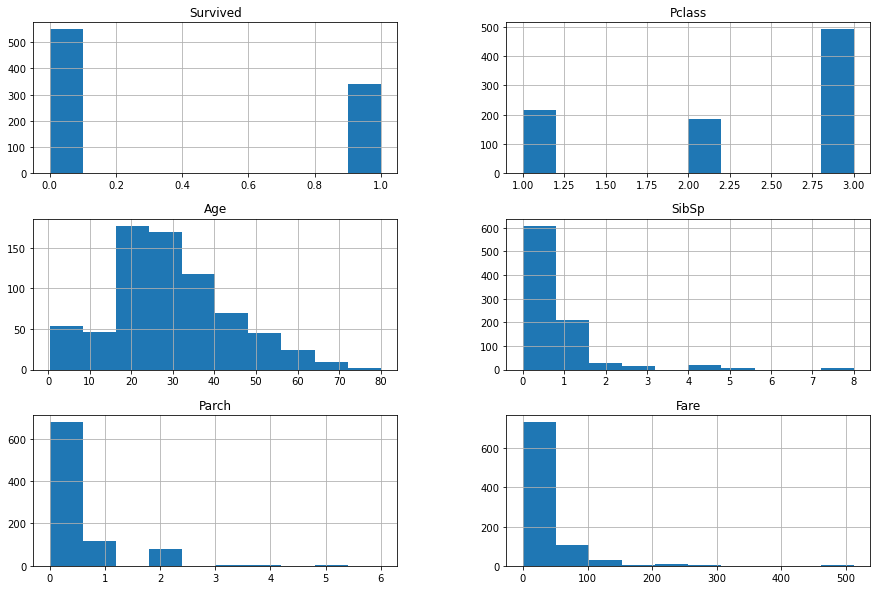

In [19]:
# we can plot the frequency graph
freqgraph = df.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(15,10))
plt.show()

From the above frequency graph we can say that age is not completely normally distributed or we can say that it is not completely right skewed data. Hence we can use median method to handle the missing values in the age feature.

In [20]:
# filling missing values for age we can use median method
df['Age'] = df['Age'].fillna(df['Age'].median()) # or df['Age'] = df['Age'].replace(np.NaN,df['Age'].median())

In [21]:
# check the null values treated or not for age feature
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# check the data type for all features in the dataset
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

As you can see it is treated well for missing values in age feature. And now, we can fill the missing values for Cabin and Embarked, it is an object data types so we can use mode function to treat the missing values.

In [23]:
# Display the Cabin feature
df.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
E49            1
B3             1
C104           1
D47            1
E58            1
Name: Cabin, Length: 147, dtype: int64

In [24]:
# Checking for mode for Cabin feature
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

We can see that it is a multimodal data. So we can fill the missing values with any of these modes. we can fill the missing values with G6

In [25]:
# fill the missing values for Cabin
df['Cabin']= df['Cabin'].fillna('G6')

In [26]:
# check the null values treated or not for Cabin
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [27]:
# Finding null values in the column 'Embarked'
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
# calculating the count of Embarked values in the dataset
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

In [29]:
# calculating the count of Embarked values in the dataset
df1 = df.Embarked.value_counts()/(len(df))*100
df1

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

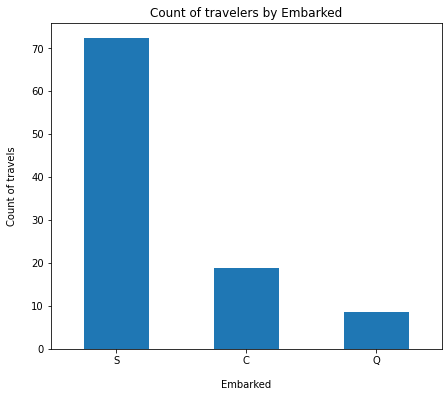

In [30]:
df1.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Embarked", labelpad=14)
plt.ylabel("Count of travels", labelpad=14)
plt.title("Count of travelers by Embarked")
plt.show()

More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown. People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

In [31]:
# Southampton (S) is repeated 644 times in embarked so we can use mode value "S" to fill the null values in the embarked feature
# fill the missing values for embarked
df['Embarked'] = df['Embarked'].fillna('S')

In [32]:
# check the null values treated or not 
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [33]:
# Display the data after missing values treatment
df[df.isna().any(axis=1)] # check at least one null values in a row 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Now our dataset is completely treated with no null values

### 5. Check and handle outliers in at least 3 columns in the dataset

In [34]:
# display the contents in the dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


**1. Fare feature**

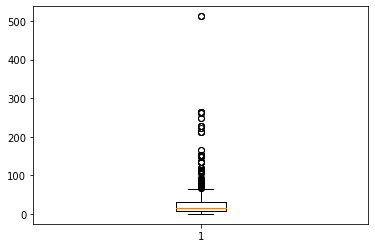

In [35]:
# for finding outliers we can use boxplot
# boxplot before removing the outliers from fare feature
plt.boxplot(df['Fare'])
plt.show()

As you can see that there are outliers present in the fare feature so we need to remove the outliers.

In [36]:
# for removing outliers first we need to check the quartiles. It will manage the outliers
Q1 = np.percentile(df['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

Q1:  7.9104 
Q2:  14.4542 
Q3:  31.0


In [37]:
# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',IQR)

IQR:  23.0896


In [38]:
#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

Lower limit is :  -26.724
Upper limit is :  65.6344


Normally the datapoints which fall below Q1-1.5(IQR) and above Q3+1.5(IQR) are considered as outliers. If the value above the upper limit or below the lower limit we need to remove that outliers.

In [39]:
# display the outilers
outliers = []
for i in df['Fare']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

Outliers in the fare feature are :  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


As you can see that these values are the outliers in the fare feature and also we can observe that there is no negative(lower limit) values and we have all the upper limit values as outliers. Now we need to find the index values for the outliers. 

In [40]:
# select the index of these outliers
indx1 = df['Fare']>upp_lm
outlier_index = df.loc[indx1].index
outlier_index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [41]:
# drop these index for removing outliers
df.drop(outlier_index, inplace=True)

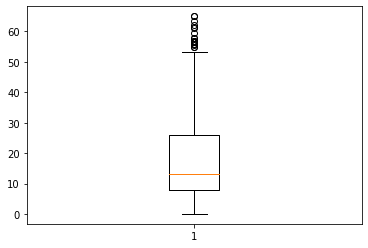

In [42]:
# boxplot after removing the outliers from fare feature
plt.boxplot(df['Fare'])
plt.show()

From the above boxplot we can see that we reduced the outliers from the fare feature.

**2. Age feature**

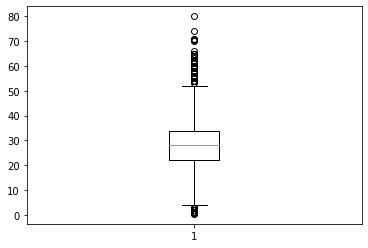

In [43]:
# boxplot before removing the outliers from fare feature
plt.boxplot(df['Age'])
plt.show()

As you can see that there are outliers present in the age feature so we need to remove the outliers.

In [44]:
# for removing outliers first we need to check the quartiles. It will manage the outliers
Q1 = np.percentile(df['Age'],25,interpolation='midpoint')
Q2 = np.percentile(df['Age'],50,interpolation='midpoint')
Q3 = np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',IQR)

#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

# display the outilers
outliers = []
for i in df['Age']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the age feature are : ",outliers)

Q1:  22.0 
Q2:  28.0 
Q3:  34.0
IQR:  12.0
Lower limit is :  4.0
Upper limit is :  52.0
Outliers in the age feature are :  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


As you can see that these values are the outliers in the age feature and also we can observe that there are lower limit values and the upper limit values present in age column as outliers. Now we need to find the index values for the outliers.

In [45]:
# select the index of these outliers
indx1 = df['Fare']>upp_lm
outlier_index = df.loc[indx1].index
outlier_index

Int64Index([  4,  55,  75,  93,  98, 138, 156, 167, 170, 249, 310, 330, 357,
            371, 435, 510, 514, 524, 578, 600, 616, 622, 644, 691, 693, 725,
            749, 755, 782, 810, 827, 839, 872],
           dtype='int64', name='PassengerId')

In [46]:
# drop these index for removing outliers
df.drop(outlier_index, inplace=True)

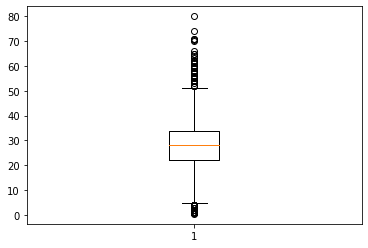

In [47]:
# boxplot after removing the outliers from age feature
plt.boxplot(df['Age'])
plt.show()

From the above boxplot we can see that we reduced the outliers from the age feature.

**3. SibSp feature**

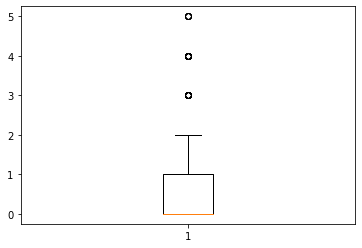

In [48]:
# boxplot before removing the outliers from SibSp feature
plt.boxplot(df['SibSp'])
plt.show()

As you can see that there are outliers present in the SibSp feature so we need to remove the outliers.

In [49]:
# for removing outliers first we need to check the quartiles. It will manage the outliers
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',IQR)

#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

# display the outilers
outliers = []
for i in df['SibSp']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the SibSp feature are : ",outliers)

Q1:  0.0 
Q2:  0.0 
Q3:  1.0
IQR:  1.0
Lower limit is :  -1.5
Upper limit is :  2.5
Outliers in the SibSp feature are :  [3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


As you can see that these values are the outliers in the SibSp feature and also we can observe that there is only the upper limit values present in SibSp column as outliers. Now we need to find the index values for the outliers.

In [50]:
# select the index of these outliers
indx1 = df['SibSp']>upp_lm
outlier_index = df.loc[indx1].index
outlier_index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [51]:
# drop these index for removing outliers
df.drop(outlier_index, inplace=True)

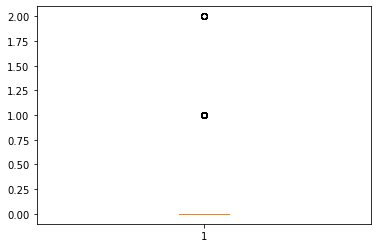

In [52]:
# boxplot after removing the outliers from SibSp feature
plt.boxplot(df['SibSp'])
plt.show()

From the above boxplot we can see that we reduced the outliers from the SibSp feature.

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

There are three Scaling method in the preprocessing

1. Standard Scaler
2. Min Max Scaler
3. Normalization

As per the question we can use with Min Max Scaler.
Minmax scaling is done to convert all our values in the range 0-1.

In [53]:
# check the number of unique values in the gender
df.Survived.nunique()

2

In [54]:
# Check the value count of Scurvived features
df['Survived'].value_counts()

0    473
1    233
Name: Survived, dtype: int64

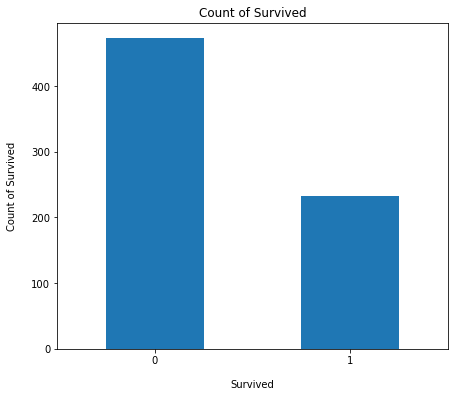

In [55]:
# Data visualization for Survived
df['Survived'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Survived", labelpad=14)
plt.ylabel("Count of Survived", labelpad=14)
plt.title("Count of Survived")
plt.show()

Survived has 473 survived and 233 deceased values in the dataset.

Before moving to the scaling we need to check the Dummy encoding with target variable 'Survived'.

In [56]:
#Dropping unwanted field for creating dummy
df1=df.drop(['Name','Ticket','Cabin'], axis=1)
df1=pd.get_dummies(df1)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0
7,0,1,54.0,0,0,51.8625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1,2,23.4500,1,0,0,0,1


<AxesSubplot:>

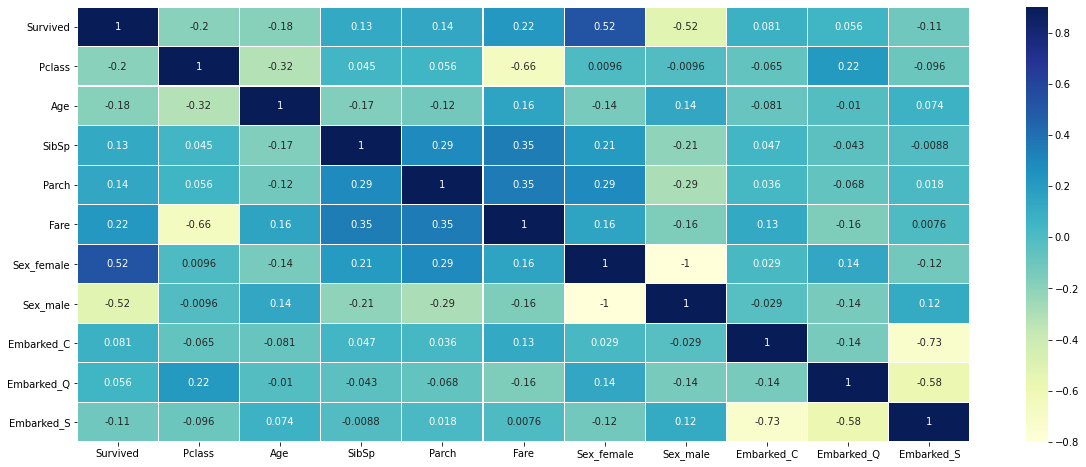

In [57]:
# Correlation matrix
corrmatrix = df1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.8, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [58]:
# Statistical summary of data frame.
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,706.000000,706.000000,706.000000,706.000000,706.00000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,0.330028,2.501416,29.388456,0.262040,0.28187,15.316849,0.304533,0.695467,0.151558,0.100567,0.747875
std,0.470556,0.707105,12.260158,0.503213,0.75972,10.530097,0.460535,0.460535,0.358846,0.300967,0.434540
min,0.000000,1.000000,0.420000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.00000,7.854200,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.00000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,34.000000,0.000000,0.00000,21.938550,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,2.000000,6.00000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Before scale the data

# assign independent and dependent variables
y=df1['Survived']
X=df1.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  0.16908791146459554
R Squared is:  0.2653547410531989


In [60]:
# Min Max Scaler
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [61]:
# Statistical summary of data frame.
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [62]:
# convert array in to data frame
X = pd.DataFrame(X)

In [63]:
# Statistical summary of data frame.
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,0.750708,0.364017,0.131020,0.046978,0.294555,0.304533,0.695467,0.151558,0.100567,0.747875
std,0.353553,0.154061,0.251607,0.126620,0.202502,0.460535,0.460535,0.358846,0.300967,0.434540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.151042,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.201923,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.421965,0.000000,0.000000,0.421895,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we can see that our data is scaled with MinMaxScaler

In [64]:
# After MinMaxScale the data

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  0.16908791146459554
R Squared is:  0.2653547410531989


**MSE value is low which means scaling has no adverse effect on our model. And R Squared is very low which means our model is not accurate. Hence there is no effect on data by min max scaling**